In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv("E:\\LEARNBAY\\Project - Jan\\march\\titanic train.csv")
df_test = pd.read_csv("E:\\LEARNBAY\\Project - Jan\\march\\titanic test.csv")

In [3]:
df_train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [4]:
df_test.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


In [5]:
#Just to identify the data of different datasets. Adding a new column. 
df_train['data'] = 'train'
df_test['data'] = 'test'

In [6]:
df = pd.concat([df_train,df_test],axis = 0)

In [7]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train


In [8]:
df.tail(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,test
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,test


In [9]:
df.shape

(1309, 13)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  data         1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 143.2+ KB


# PRE - PROCESSING STARTS HERE

In [11]:
#STEP 1: Handle Missing Data

df.isnull().sum() / len(df)*100

PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
data            0.000000
dtype: float64

In [12]:
#Deleting Cabin as 77% data is missing..

df = df.drop(['Cabin'],axis = 1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Embarked     1307 non-null   object 
 11  data         1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [14]:
df['Age'].median()

28.0

In [15]:
df['Age'].mean()

29.881137667304014

In [16]:
#Replaceing the missing data of age with the median...

df['Age']=df['Age'].fillna(28)

In [17]:
df.isnull().sum() / len(df)*100

PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Embarked        0.152788
data            0.000000
dtype: float64

In [18]:
#Fare is not required...it doesn't impact whether a 
# person will survived or not.
# Other features which are not very important....
# PassengerId
# Name
# Ticket
# Fare

df = df.drop(['PassengerId','Name','Ticket','Fare'],axis= 1)
df.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,data
0,0.0,3,male,22.0,1,0,S,train


In [19]:
df['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [20]:
df['Embarked'] = df['Embarked'].fillna('S')

In [21]:
df.isnull().sum() / len(df)*100

Survived    31.932773
Pclass       0.000000
Sex          0.000000
Age          0.000000
SibSp        0.000000
Parch        0.000000
Embarked     0.000000
data         0.000000
dtype: float64

MISSING DATA HAS BEEN HANDLED.

# 2 . ENCODING STARTS

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1309 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Embarked  1309 non-null   object 
 7   data      1309 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 92.0+ KB


In [23]:
df= pd.get_dummies(df,columns = ['Pclass'])

In [24]:
df = pd.get_dummies(df,columns =['Sex','Embarked'])

In [25]:
df.head(1)

,Survived,Age,SibSp,Parch,data,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,22.0,1,0,train,0,0,1,0,1,0,0,1


In [26]:
#Deleteing the dummy variable - to remove the roblem of multicolinearity. 
df=df.drop(['Pclass_3','Sex_male','Embarked_Q'],axis = 1)

In [27]:
df.head(1)

,Survived,Age,SibSp,Parch,data,Pclass_1,Pclass_2,Sex_female,Embarked_C,Embarked_S
0,0.0,22.0,1,0,train,0,0,0,0,1


Encoding Complete

# 3. Outlier Treatment - IN LOGISTIC REGRESSION, We don't need to handle the outliers. 

# 4. Feature Scaling 

If accuracy is not good, then we do feature scaling here. 

# Segregating the DV and IDVs in different datasets for both train and test dataset. 

In [28]:
train = df[df['data']=='train']
test = df[df['data']=='test']

In [29]:
train = train.drop(['data'],axis=1)
test = test.drop(['data'],axis=1)

In [30]:
train.head(1)

,Survived,Age,SibSp,Parch,Pclass_1,Pclass_2,Sex_female,Embarked_C,Embarked_S
0,0.0,22.0,1,0,0,0,0,0,1


In [31]:
x = train.drop(['Survived'],axis=1)
y = train['Survived']

In [32]:
x.head()

,Age,SibSp,Parch,Pclass_1,Pclass_2,Sex_female,Embarked_C,Embarked_S
0,22.0,1,0,0,0,0,0,1
1,38.0,1,0,1,0,1,1,0
2,26.0,0,0,0,0,1,0,1
3,35.0,1,0,1,0,1,0,1
4,35.0,0,0,0,0,0,0,1


In [33]:
x1 = test.drop(['Survived'],axis=1)
y1 = test['Survived']

In [34]:
x1.head(1)

,Age,SibSp,Parch,Pclass_1,Pclass_2,Sex_female,Embarked_C,Embarked_S
0,34.5,0,0,0,0,0,0,0


In [35]:
y1.head(1)

0   NaN
Name: Survived, dtype: float64

# Last Pre-processing To check Imbalance dataset.

In [36]:
y.value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

In [37]:
342*2 

684

684(342 * 2) > 549 : Hence, the dataset is balanced. 

# Exploratory Data Analysis (EDA)

In [38]:
for i in df.columns:
    print("************************",i,"************************")
    print()
    print(set(df[i].tolist()))
    print()

************************ Survived ************************

{0.0, 1.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,

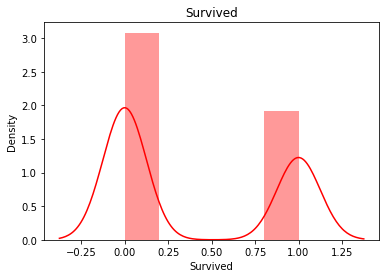

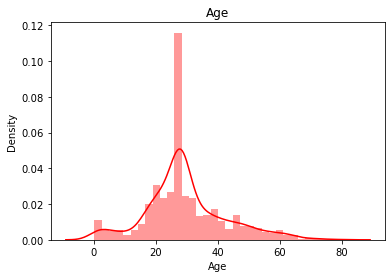

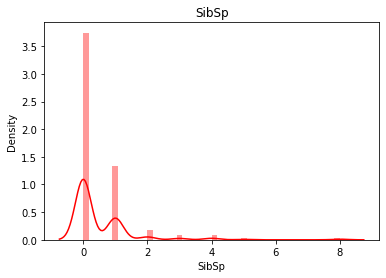

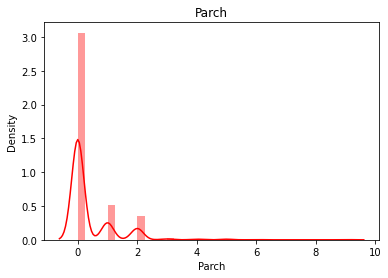

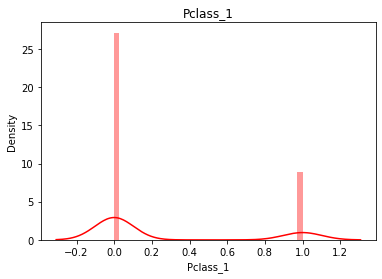

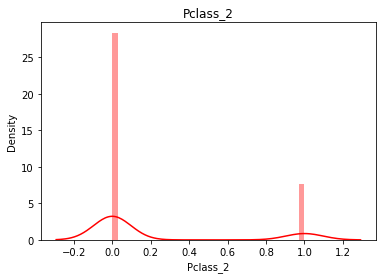

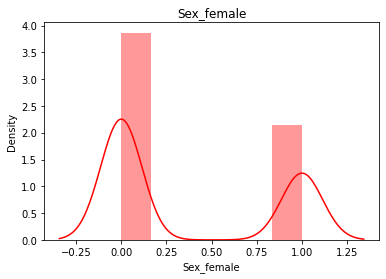

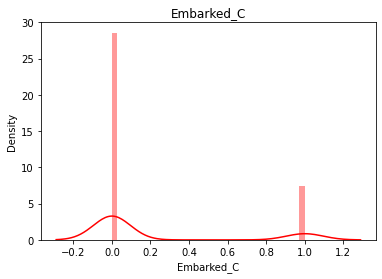

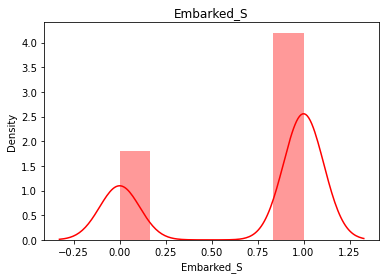

In [39]:
def dist(i):
    plt.title(i)
    sns.distplot(df[i],color='red')
    plt.show()
    
for i in df.select_dtypes(exclude='object').columns:
    dist(i)

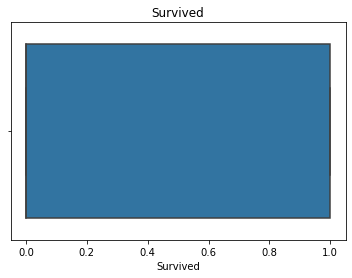

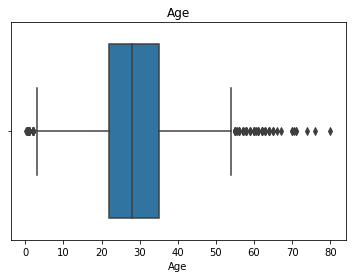

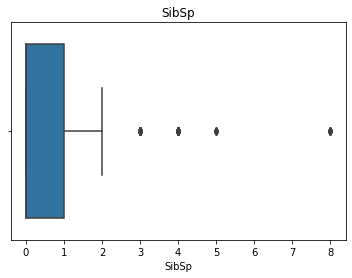

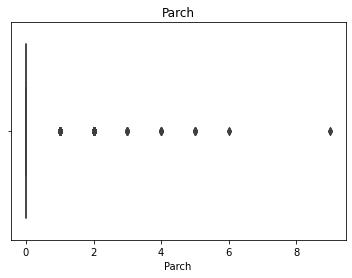

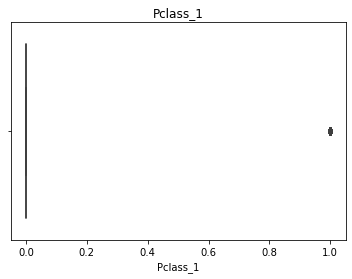

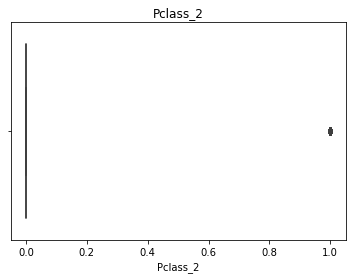

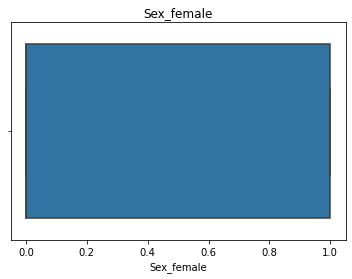

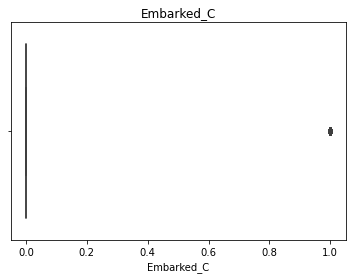

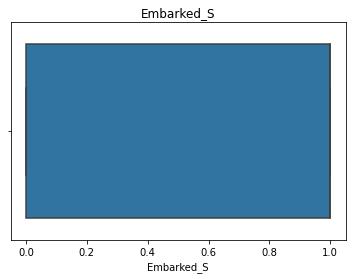

In [40]:
def box(i):
    plt.title(i)
    sns.boxplot(df[i])
    plt.show()
    
for i in df.select_dtypes(exclude='object').columns:
    box(i)

<AxesSubplot:>

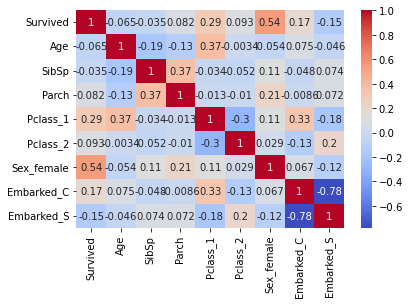

In [41]:
sns.heatmap(df.corr(),annot = True,cmap='coolwarm')

#No features are highly correlated. 

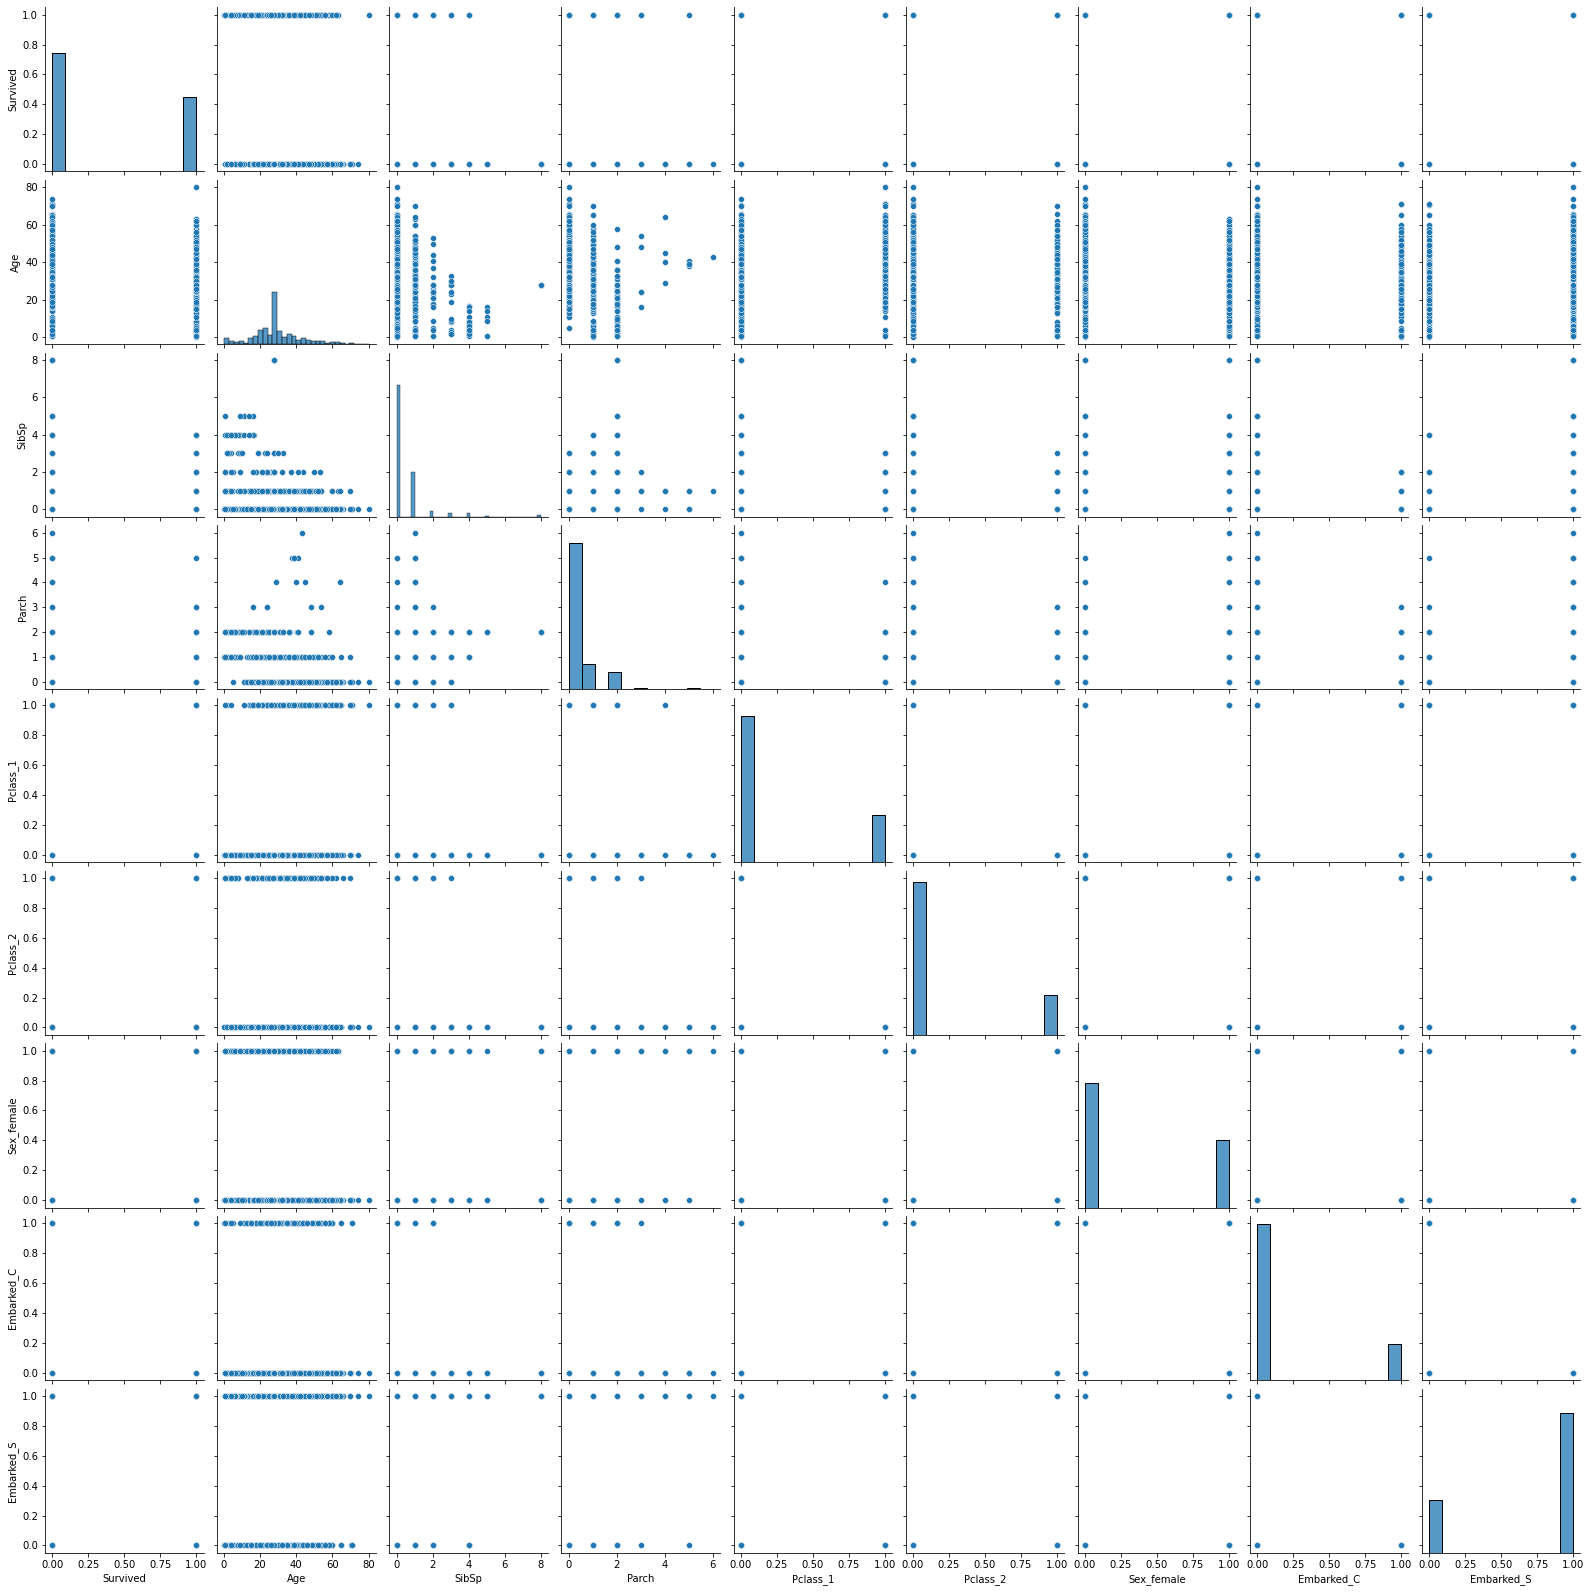

In [42]:
sns.pairplot(train)

In [43]:
from pandas_profiling import ProfileReport
report = ProfileReport(df)
report.to_file("Titanic.html")

#detailed EDA report generated.

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Spliting the data in training and testing set. 

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=217)

In [45]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(712, 8) (179, 8) (712,) (179,)


# Model Building

In [46]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [47]:
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

# Model Evaluation

In [48]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

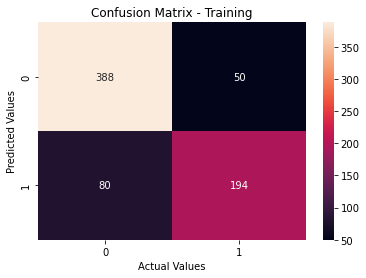

In [49]:
plt.title("Confusion Matrix - Training")
sns.heatmap(confusion_matrix(y_train,y_pred_train),annot = True,fmt='0.0f')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

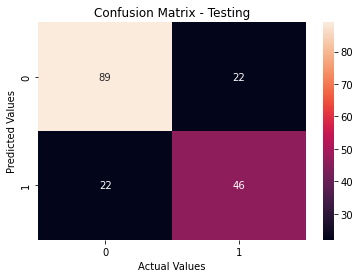

In [50]:
plt.title("Confusion Matrix - Testing")
sns.heatmap(confusion_matrix(y_test,y_pred_test),annot = True,fmt='0.0f')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [51]:
print(classification_report(y_train,y_pred_train))
print("***"*9)
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86       438
         1.0       0.80      0.71      0.75       274

    accuracy                           0.82       712
   macro avg       0.81      0.80      0.80       712
weighted avg       0.82      0.82      0.82       712

***************************
              precision    recall  f1-score   support

         0.0       0.80      0.80      0.80       111
         1.0       0.68      0.68      0.68        68

    accuracy                           0.75       179
   macro avg       0.74      0.74      0.74       179
weighted avg       0.75      0.75      0.75       179



In [52]:
print("Accuracy Score - Training",accuracy_score(y_train,y_pred_train))
print("*******************"*6)
print("Accuracy Score - Testing",accuracy_score(y_test,y_pred_test))

Accuracy Score - Training 0.8174157303370787
******************************************************************************************************************
Accuracy Score - Testing 0.7541899441340782


In [53]:
#Improving the Model - Cross Validation Method

from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(lr,x_test,y_test,cv = 10)
accuracy

array([0.83333333, 0.72222222, 0.72222222, 0.55555556, 0.94444444,
       0.72222222, 0.83333333, 0.72222222, 0.83333333, 0.76470588])

In [54]:
print("Accuracy Mean", accuracy.mean())
print("Best accurac",accuracy[4])

Accuracy Mean 0.765359477124183
Best accurac 0.9444444444444444


# ROC - AUC Curve

In [55]:
from sklearn.metrics import roc_auc_score
lr_roc_auc = roc_auc_score(y_test,y_pred_test)
lr_roc_auc

0.739136195018548

In [56]:
from sklearn.metrics import roc_curve
fpr,tpr,threshold = roc_curve(y_test,y_pred_test)

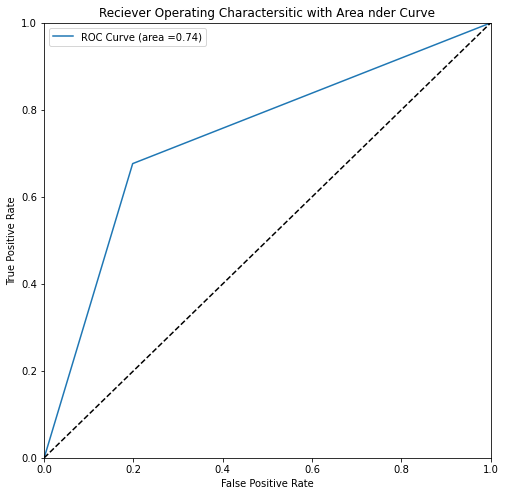

In [57]:
plt.figure(figsize=(8,8))
plt.plot(fpr,tpr,label="ROC Curve (area =%0.2f)"%lr_roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Reciever Operating Charactersitic with Area nder Curve")
plt.legend()
plt.show()

# Checking the overfitting, underfitting problem in the model - Regularization

In [58]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [59]:
ridge = Ridge(alpha=0.1)
ridge.fit(x_train,y_train)
y_ridge_pred = ridge.predict(x_test)
y_ridge_pred = np.where(y_ridge_pred > 0.5, 1, 0)
# y_ridge_pred
print(accuracy_score(y_test,y_ridge_pred))

0.7486033519553073


In [60]:
lasso = Lasso(alpha=0.1)
lasso.fit(x_train,y_train)
y_lasso_pred = lasso.predict(x_test)
y_lasso_pred = np.where(y_lasso_pred > 0.5,1,0)
print(accuracy_score(y_test,y_lasso_pred))

0.6201117318435754


In [61]:
en = ElasticNet(alpha=0.1)
en.fit(x_train,y_train)
y_en_pred = en.predict(x_test)
y_en_pred = np.where(y_en_pred > 0.5, 1, 0)
print(accuracy_score(y_test,y_en_pred))

0.7653631284916201


In [62]:
#Gradient Descent Method

In [63]:
from sklearn.linear_model import SGDClassifier
sdg = SGDClassifier()
sdg.fit(x_train,y_train)

SGDClassifier()

In [64]:
y_pred_sdg = sdg.predict(x_test)
print(accuracy_score(y_test,y_pred_sdg))

0.6703910614525139


# Decision Tree
1. Using Gini
2. Uning ENtropy

In [65]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini')
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [66]:
y_pred_dt_test = dtree.predict(x_test)
y_pred_dt_train = dtree.predict(x_train)

In [67]:
print("Accuracy - Testing", accuracy_score(y_test,y_pred_dt_test))
print("Accuracy - Training", accuracy_score(y_train,y_pred_dt_train))

Accuracy - Testing 0.8044692737430168
Accuracy - Training 0.9410112359550562


In [68]:
dtreeE = DecisionTreeClassifier(criterion='entropy')
dtreeE.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [69]:
y_pred_dte_train = dtreeE.predict(x_train)
y_pred_dte_test = dtreeE.predict(x_test)

In [70]:
print("Accuracy - Testing", accuracy_score(y_test,y_pred_dte_test))
print("Accuracy - Training", accuracy_score(y_train,y_pred_dte_train))

Accuracy - Testing 0.7988826815642458
Accuracy - Training 0.9410112359550562


In [71]:
from sklearn import tree

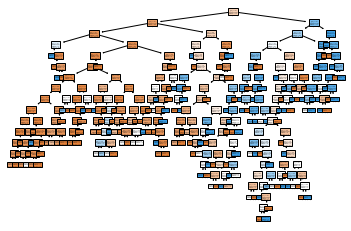

In [72]:
tree.plot_tree(dtreeE,filled=True)
plt.show()

# Random FOrest Classifier

In [73]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500,criterion='entropy')
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500)

In [74]:
y_pred_rf_train = rf.predict(x_train)
y_pred_rf_test = rf.predict(x_test)

In [75]:
print("Acuracy Score - Train",accuracy_score(y_train,y_pred_rf_train))
print("Acuracy Score - Test",accuracy_score(y_test,y_pred_rf_test))

Acuracy Score - Train 0.9410112359550562
Acuracy Score - Test 0.770949720670391


# FINAL RESULT _ PREDICTING FOR THE TEST DATASET

In [76]:
final_result = lr.predict(x1)

In [77]:
final_report = pd.concat([x1,pd.DataFrame(final_result)],axis=1)

In [78]:
final_report.head(3)

,Age,SibSp,Parch,Pclass_1,Pclass_2,Sex_female,Embarked_C,Embarked_S,0
0,34.5,0,0,0,0,0,0,0,0.0
1,47.0,1,0,0,0,1,0,1,0.0
2,62.0,0,0,0,1,0,0,0,0.0


In [79]:
final_report = final_report.rename(columns={0:'Survived'})

In [80]:
final_report.head(10)

,Age,SibSp,Parch,Pclass_1,Pclass_2,Sex_female,Embarked_C,Embarked_S,Survived
0,34.5,0,0,0,0,0,0,0,0.0
1,47.0,1,0,0,0,1,0,1,0.0
2,62.0,0,0,0,1,0,0,0,0.0
3,27.0,0,0,0,0,0,0,1,0.0
4,22.0,1,1,0,0,1,0,1,1.0
5,14.0,0,0,0,0,0,0,1,0.0
6,30.0,0,0,0,0,1,0,0,1.0
7,26.0,1,1,0,1,0,0,1,0.0
8,18.0,0,0,0,0,1,1,0,1.0
9,21.0,2,0,0,0,0,0,1,0.0


# LOGISTIC REGRESSION DONE